####Import the libraries:

In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# I like seaborn to make plots pretty:
import seaborn as sns
sns.set(context='poster', style='dark')

from sklearn import cross_validation
from sklearn import ensemble, feature_extraction, preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import time

In [2]:
# load the csv
# make sure the csv is in the same folder where you started IPython
# e.g., I went to the folder where I had this file, started Terminal in it, and then typed IPython notebook

virus_df = pd.read_csv('bunyaviruses.csv')

In [4]:
virus_df.head() # the first 5 entries

,Unnamed: 0,species,Pc1.A,Pc1.R,Pc1.N,Pc1.D,Pc1.C,Pc1.E,Pc1.Q,Pc1.G,...,Pc2.Hydrophobicity.26,Pc2.Hydrophilicity.26,Pc2.Hydrophobicity.27,Pc2.Hydrophilicity.27,Pc2.Hydrophobicity.28,Pc2.Hydrophilicity.28,Pc2.Hydrophobicity.29,Pc2.Hydrophilicity.29,Pc2.Hydrophobicity.30,Pc2.Hydrophilicity.30
0,gb:AEJ38173|gi:339283810|UniProtKB:G0Y277|Orga...,unclass,25.049861,9.634562,6.744193,9.634562,2.890369,12.524931,9.634562,19.269124,...,0.006746,0.006806,0.005731,0.003502,0.001022,0.005456,0.005547,0.007338,-0.004274,-0.000973
1,gb:AGX32054|gi:549720862|UniProtKB:U5LTZ9|Orga...,unclass,13.951165,8.968606,12.954653,11.958141,2.989535,11.958141,6.975583,16.940700,...,-0.005564,-0.002655,-0.003038,-0.002520,0.001065,-0.000915,-0.002200,-0.000244,-0.004983,0.001037
2,gb:AGX32056|gi:549720867|UniProtKB:U5LTZ9|Orga...,unclass,13.951165,8.968606,12.954653,11.958141,2.989535,11.958141,6.975583,16.940700,...,-0.005564,-0.002655,-0.003038,-0.002520,0.001065,-0.000915,-0.002200,-0.000244,-0.004983,0.001037
3,gb:AFR34025|gi:403311042|UniProtKB:U5F073|Orga...,unclass,13.951165,8.968606,12.954653,11.958141,2.989535,11.958141,6.975583,16.940700,...,-0.005564,-0.002655,-0.003038,-0.002520,0.001065,-0.000915,-0.002200,-0.000244,-0.004983,0.001037
4,gb:AHI10996|gi:578004424|UniProtKB:W5XD75|Orga...,unclass,14.030074,17.036519,11.023630,12.025778,8.017185,24.051556,8.017185,10.021482,...,-0.002259,-0.000595,-0.007015,-0.006006,-0.009443,-0.004018,0.000982,0.000268,0.004463,0.005986


In [8]:
virus_df.tail(10) # the last 10 entries

,Unnamed: 0,species,Pc1.A,Pc1.R,Pc1.N,Pc1.D,Pc1.C,Pc1.E,Pc1.Q,Pc1.G,...,Pc2.Hydrophobicity.26,Pc2.Hydrophilicity.26,Pc2.Hydrophobicity.27,Pc2.Hydrophilicity.27,Pc2.Hydrophobicity.28,Pc2.Hydrophilicity.28,Pc2.Hydrophobicity.29,Pc2.Hydrophilicity.29,Pc2.Hydrophobicity.30,Pc2.Hydrophilicity.30
3521,gb:YP_006590077|gi:401829617|UniProtKB:Q1MXB4|...,ortobunyavirus,25.113086,8.036188,12.054281,9.040711,2.009047,9.040711,13.058805,15.067852,...,0.003518,0.003648,-0.000852,-0.002609,0.001372,0.000298,0.000105,-0.001986,-0.002027,-0.000521
3522,gb:YP_006590078|gi:401829618|UniProtKB:J4GMU9|...,ortobunyavirus,0.000000,7.111839,6.095862,1.015977,2.031954,1.015977,6.095862,5.079885,...,0.004065,0.001763,0.007748,0.005422,-0.000670,0.001729,-0.004739,-0.000222,-0.002352,0.000142
3523,gb:YP_006590083|gi:401829628|UniProtKB:J4FBY0|...,ortobunyavirus,26.420220,10.161623,14.226272,8.129298,1.016162,10.161623,15.242434,15.242434,...,0.003799,0.003940,0.000270,-0.001697,-0.000689,-0.000084,0.000005,-0.002411,-0.001050,-0.000620
3524,gb:YP_006590084|gi:401829629|UniProtKB:Q8QZ52|...,ortobunyavirus,0.000000,8.648042,6.486031,1.081005,1.081005,2.162010,4.324021,6.486031,...,0.003132,0.000424,-0.000241,-0.001488,0.003623,0.002596,-0.000870,0.000265,-0.015513,-0.007895
3525,gb:YP_008003509|gi:506614350|UniProtKB:R4P2G7|...,ortobunyavirus,30.621377,11.135046,9.279205,12.990887,1.855841,17.630490,6.495444,9.279205,...,0.005515,0.009286,0.002771,0.005485,0.001900,0.002324,0.002063,0.005538,0.001573,0.004210
3526,gb:YP_008003510|gi:506614349|UniProtKB:R4P4N4|...,ortobunyavirus,18.775283,23.716147,2.964518,17.787110,7.905382,13.834419,7.905382,15.810765,...,0.002818,0.002731,0.004662,0.001683,-0.002057,-0.000510,-0.000160,0.002945,0.002660,0.002290
3527,gb:YP_008400135|gi:530323622|UniProtKB:S5XAL3|...,ortobunyavirus,2.000581,11.003197,4.001163,4.001163,8.002325,6.001744,9.002616,8.002325,...,0.012364,0.007807,-0.006460,-0.004650,-0.004708,0.001275,-0.001260,-0.000728,-0.000657,0.000945
3528,gb:YP_008400136|gi:530323621|UniProtKB:S5WVQ5|...,ortobunyavirus,39.009626,21.005183,13.003209,21.005183,3.000740,21.005183,53.013081,27.006664,...,-0.000235,-0.000068,0.004411,0.002152,-0.000104,0.000979,0.000418,0.003715,0.002655,0.001291
3529,gb:YP_008709778|gi:554505425|UniProtKB:U3RCR8|...,ortobunyavirus,26.518101,8.839367,10.803671,11.785823,0.000000,12.767975,11.785823,11.785823,...,-0.001809,-0.000148,-0.002018,-0.004032,-0.002025,0.000245,-0.000084,-0.000549,0.004767,0.002355
3530,gb:YP_009028568|gi:632842270|UniProtKB:M1F379|...,ortobunyavirus,30.470578,18.282347,13.203917,9.141173,2.031372,10.156859,15.235289,11.172545,...,0.002216,0.000736,-0.000883,-0.001624,0.001658,0.001855,0.000079,-0.000761,-0.001701,-0.001203


In [3]:
#drop the first column; inplace=True means it will drop it in the actual DataFrame object

virus_df.drop(['Unnamed: 0'], 1, inplace=True)
virus_df.tail()

,species,Pc1.A,Pc1.R,Pc1.N,Pc1.D,Pc1.C,Pc1.E,Pc1.Q,Pc1.G,Pc1.H,...,Pc2.Hydrophobicity.26,Pc2.Hydrophilicity.26,Pc2.Hydrophobicity.27,Pc2.Hydrophilicity.27,Pc2.Hydrophobicity.28,Pc2.Hydrophilicity.28,Pc2.Hydrophobicity.29,Pc2.Hydrophilicity.29,Pc2.Hydrophobicity.30,Pc2.Hydrophilicity.30
3526,ortobunyavirus,18.775283,23.716147,2.964518,17.787110,7.905382,13.834419,7.905382,15.810765,2.964518,...,0.002818,0.002731,0.004662,0.001683,-0.002057,-0.000510,-0.000160,0.002945,0.002660,0.002290
3527,ortobunyavirus,2.000581,11.003197,4.001163,4.001163,8.002325,6.001744,9.002616,8.002325,4.001163,...,0.012364,0.007807,-0.006460,-0.004650,-0.004708,0.001275,-0.001260,-0.000728,-0.000657,0.000945
3528,ortobunyavirus,39.009626,21.005183,13.003209,21.005183,3.000740,21.005183,53.013081,27.006664,2.000494,...,-0.000235,-0.000068,0.004411,0.002152,-0.000104,0.000979,0.000418,0.003715,0.002655,0.001291
3529,ortobunyavirus,26.518101,8.839367,10.803671,11.785823,0.000000,12.767975,11.785823,11.785823,4.910759,...,-0.001809,-0.000148,-0.002018,-0.004032,-0.002025,0.000245,-0.000084,-0.000549,0.004767,0.002355
3530,ortobunyavirus,30.470578,18.282347,13.203917,9.141173,2.031372,10.156859,15.235289,11.172545,3.047058,...,0.002216,0.000736,-0.000883,-0.001624,0.001658,0.001855,0.000079,-0.000761,-0.001701,-0.001203


In [11]:
np.unique(virus_df.species) # I want to see unique values for the 'species'

array(['hantavirus', 'nairovirus', 'negevirus', 'ortobunyavirus',
       'phlebovirus', 'unclass'], dtype=object)

In [14]:
lbl_enc = preprocessing.LabelEncoder()
labels = lbl_enc.fit_transform(virus_df.species)

In [16]:
labels # now your species became labels

array([5, 5, 5, ..., 3, 3, 3])

In [18]:
print(labels.shape)
print(virus_df.species.shape) # same number

(3531,)
(3531,)


In [20]:
virus_df['labels'] = labels
virus_df.head()

,species,Pc1.A,Pc1.R,Pc1.N,Pc1.D,Pc1.C,Pc1.E,Pc1.Q,Pc1.G,Pc1.H,...,Pc2.Hydrophilicity.26,Pc2.Hydrophobicity.27,Pc2.Hydrophilicity.27,Pc2.Hydrophobicity.28,Pc2.Hydrophilicity.28,Pc2.Hydrophobicity.29,Pc2.Hydrophilicity.29,Pc2.Hydrophobicity.30,Pc2.Hydrophilicity.30,labels
0,unclass,25.049861,9.634562,6.744193,9.634562,2.890369,12.524931,9.634562,19.269124,4.817281,...,0.006806,0.005731,0.003502,0.001022,0.005456,0.005547,0.007338,-0.004274,-0.000973,5
1,unclass,13.951165,8.968606,12.954653,11.958141,2.989535,11.958141,6.975583,16.940700,2.989535,...,-0.002655,-0.003038,-0.002520,0.001065,-0.000915,-0.002200,-0.000244,-0.004983,0.001037,5
2,unclass,13.951165,8.968606,12.954653,11.958141,2.989535,11.958141,6.975583,16.940700,2.989535,...,-0.002655,-0.003038,-0.002520,0.001065,-0.000915,-0.002200,-0.000244,-0.004983,0.001037,5
3,unclass,13.951165,8.968606,12.954653,11.958141,2.989535,11.958141,6.975583,16.940700,2.989535,...,-0.002655,-0.003038,-0.002520,0.001065,-0.000915,-0.002200,-0.000244,-0.004983,0.001037,5
4,unclass,14.030074,17.036519,11.023630,12.025778,8.017185,24.051556,8.017185,10.021482,7.015037,...,-0.000595,-0.007015,-0.006006,-0.009443,-0.004018,0.000982,0.000268,0.004463,0.005986,5


In [22]:
X = virus_df.drop(['species', 'labels'], 1, inplace=False).values
# I am not dropping these columns from the original DataFrame, just passing a copy of values with them dropped
X

array([[  2.50498611e+01,   9.63456196e+00,   6.74419337e+00, ...,
          7.33797952e-03,  -4.27382768e-03,  -9.72797699e-04],
       [  1.39511650e+01,   8.96860609e+00,   1.29546532e+01, ...,
         -2.43792592e-04,  -4.98259321e-03,   1.03699067e-03],
       [  1.39511650e+01,   8.96860609e+00,   1.29546532e+01, ...,
         -2.43792592e-04,  -4.98259321e-03,   1.03699067e-03],
       ..., 
       [  3.90096256e+01,   2.10051830e+01,   1.30032085e+01, ...,
          3.71538154e-03,   2.65484572e-03,   1.29148893e-03],
       [  2.65181009e+01,   8.83936697e+00,   1.08036707e+01, ...,
         -5.48733677e-04,   4.76695530e-03,   2.35492014e-03],
       [  3.04705777e+01,   1.82823466e+01,   1.32039170e+01, ...,
         -7.61128067e-04,  -1.70104978e-03,  -1.20341865e-03]])

In [24]:
X[0] # your first datapoint, with all columns

array([  2.50498611e+01,   9.63456196e+00,   6.74419337e+00,
         9.63456196e+00,   2.89036859e+00,   1.25249305e+01,
         9.63456196e+00,   1.92691239e+01,   4.81728098e+00,
         1.73422115e+01,   2.60133173e+01,   1.73422115e+01,
         8.67110576e+00,   5.78073718e+00,   1.15614744e+01,
         1.92691239e+01,   1.83056677e+01,   9.63456196e-01,
         1.15614744e+01,   1.44518429e+01,  -2.10432949e-03,
         8.34510624e-05,  -1.31438816e-03,  -1.35976927e-03,
         5.60677893e-04,   1.84811652e-03,   1.97897017e-03,
         1.13515296e-03,   5.93903622e-03,   2.80047358e-03,
         3.78078620e-03,   4.12415499e-03,  -2.84428174e-03,
        -2.64339885e-03,   6.54231747e-04,   9.61821755e-04,
        -3.26306193e-03,  -1.96764706e-03,   1.15509447e-03,
        -7.41637184e-04,   4.05366506e-03,  -3.52450774e-04,
        -1.08283572e-03,  -3.78765714e-03,  -4.00692479e-03,
        -3.94217457e-03,  -3.93895804e-04,  -1.95403678e-03,
         3.37246884e-03,

In [26]:
y = labels
y

array([5, 5, 5, ..., 3, 3, 3])

In [27]:
# Now you choose your favorite classifier
# I will use gradient boosting classifier -- an ensemble method using random forests

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

import time

gbc = GradientBoostingClassifier() # create a classifier model instance; use your favorite model instead

print("start cross-validation... ", time.ctime().split()[3])

# THIS is where you cross-validate the X and Y by splitting (X, Y) into training/testing datasets 5 times:

scores = cross_validation.cross_val_score(gbc, X, y, cv=5, n_jobs=-1) #n_jobs means use all your processor cores

print("done cross-validation... ", time.ctime().split()[3])
print('scores:\t', scores)
print('mean_score:\t', np.mean(scores))

start cross-validation...  20:57:32
done cross-validation...  20:57:56
scores:	 [ 0.88716502  0.97312588  0.94192635  0.95602837  0.92613636]
mean_score:	 0.936876396643


### So, that looks good ^. You're on average predicting 94% of your sample. We can try improving it:

In [32]:
# these are my default go-to params for gbc.
# You can estimate the right hyper-parameter combination using grid search or just tinker with them by hand

params = {'max_depth':20, 'subsample':0.5, 'verbose':0, 'random_state':0,
        'min_samples_split':20, 'min_samples_leaf':20, 'max_features':'sqrt',
        'n_estimators': 750, 'learning_rate': 0.01}

gbc_1 = GradientBoostingClassifier(**params) # pass params instead of using defaults

print("start cross-validation... ", time.ctime().split()[3])

scores = cross_validation.cross_val_score(gbc_1, X, y, cv=5, n_jobs=-1) #n_jobs means use all your processor cores

print("done cross-validation... ", time.ctime().split()[3])
print('scores:\t', scores)
print('mean_score:\t', np.mean(scores))

start cross-validation...  21:01:49
done cross-validation...  21:02:45
scores:	 [ 0.94640339  0.97454031  0.94334278  0.95744681  0.92897727]
mean_score:	 0.950142110733


### Now let's actually fit X and y into the classifier to do prediction or print out feature importances

In [34]:
# I am using the second model, despite only marginal improvement (from 94% to 95%)
# Before I do that, let me change verbose values

gbc_1 = GradientBoostingClassifier(**params) # pass params instead of using defaults
gbc_1.verbose = 1

gbc_1.fit(X, y)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1        2855.6233          67.3048           35.66s
         2        2791.2010          64.1916           32.96s
         3        2734.0995          61.2963           35.00s
         4        2670.1707          59.2913           35.73s
         5        2619.3647          56.4337           37.65s
         6        2553.6687          54.9918           38.74s
         7        2506.7940          52.5010           39.64s
         8        2454.1848          50.5261           40.24s
         9        2401.1718          49.5282           40.62s
        10        2354.7529          46.7737           41.03s
        20        1943.6965          34.7986           43.68s
        30        1640.5425          27.5155           44.20s
        40        1400.2964          21.6926           44.60s
        50        1183.1064          17.4655           44.59s
        60        1019.8304          13.9488           44.54s
       

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=20, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=20, min_samples_split=20,
              min_weight_fraction_leaf=0.0, n_estimators=750,
              random_state=0, subsample=0.5, verbose=1, warm_start=False)

### So, the last few hundred epochs were overfitting...

### Now, if you need to predict classes for an unknown set, you just do:

In [42]:
X_unknown = X + np.random.rand() * 0.001

# I am creating a mock dataset; you could also split your original X into X_valid and X_train:

from sklearn.cross_validation import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.90)

# Then you train on (X_train, y_train) and test on (X_valid, y_valid). I should've prob done that above
# But now let's assume X_unknown is really an unknown dataset:

y_predict = gbc_1.predict(X_unknown)

In [43]:
y_predict

array([3, 3, 3, ..., 3, 3, 3])

In [45]:
np.unique(y_predict)

array([0, 1, 2, 3, 4])

### Then you convert your {0...4} back into the original classes using some dict or whatever.
### You can also try to print out importances. I wrote this little function for that:

In [49]:
cols = virus_df.drop(['species', 'labels'], 1, inplace=False).columns.values

# I am just printing out the names for X's from the original DataFrame ^

def plot_feats(cols, feats_, num=10):
    feat_imports = dict(zip(cols, feats_))
    import operator
    feats_sorted = sorted(feat_imports.items(), key=operator.itemgetter(1), reverse=True)
    
    
    labels = list(zip(*feats_sorted))[0][:num]
    vals = list(zip(*feats_sorted))[1][:num]

    labels = list(reversed(labels))
    vals = list(reversed(vals))

    fig, ax = plt.subplots()
    ind = np.arange(len(vals))
    width = 0.75
    ax.barh(ind, vals)
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(labels);
    plt.xlabel('relative importance');
    
# This function will make a barchart with top N importances; default N=10

UsageError: unrecognized arguments: # to make images appear in this notebook

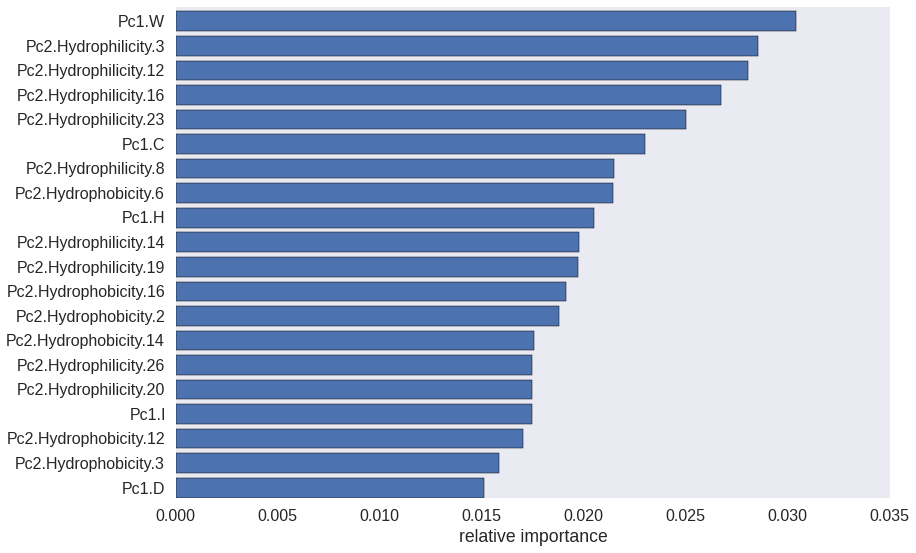

In [64]:
plot_feats(cols, gbc_1.feature_importances_, 20) # pass .feature_importances_ from your model

### Depending on which model you use, you can print out coefficients or whatever. See documentation for the specific model on scikit-learn's website. But most scikit-learn packages use API similar to above.

### Hope this helps! I am not including details on how to choose a model, do cross-validation, compute loss, etc. Detail on all those things is online...


##Part II: 

In [110]:
unclass_df = virus_df[virus_df.species=='unclass']
class_df =  virus_df[virus_df.species!='unclass']
unclass_df.head()

,species,Pc1.A,Pc1.R,Pc1.N,Pc1.D,Pc1.C,Pc1.E,Pc1.Q,Pc1.G,Pc1.H,...,Pc2.Hydrophobicity.26,Pc2.Hydrophilicity.26,Pc2.Hydrophobicity.27,Pc2.Hydrophilicity.27,Pc2.Hydrophobicity.28,Pc2.Hydrophilicity.28,Pc2.Hydrophobicity.29,Pc2.Hydrophilicity.29,Pc2.Hydrophobicity.30,Pc2.Hydrophilicity.30
0,unclass,25.049861,9.634562,6.744193,9.634562,2.890369,12.524931,9.634562,19.269124,4.817281,...,0.006746,0.006806,0.005731,0.003502,0.001022,0.005456,0.005547,0.007338,-0.004274,-0.000973
1,unclass,13.951165,8.968606,12.954653,11.958141,2.989535,11.958141,6.975583,16.940700,2.989535,...,-0.005564,-0.002655,-0.003038,-0.002520,0.001065,-0.000915,-0.002200,-0.000244,-0.004983,0.001037
2,unclass,13.951165,8.968606,12.954653,11.958141,2.989535,11.958141,6.975583,16.940700,2.989535,...,-0.005564,-0.002655,-0.003038,-0.002520,0.001065,-0.000915,-0.002200,-0.000244,-0.004983,0.001037
3,unclass,13.951165,8.968606,12.954653,11.958141,2.989535,11.958141,6.975583,16.940700,2.989535,...,-0.005564,-0.002655,-0.003038,-0.002520,0.001065,-0.000915,-0.002200,-0.000244,-0.004983,0.001037
4,unclass,14.030074,17.036519,11.023630,12.025778,8.017185,24.051556,8.017185,10.021482,7.015037,...,-0.002259,-0.000595,-0.007015,-0.006006,-0.009443,-0.004018,0.000982,0.000268,0.004463,0.005986


In [131]:
X_class = class_df.drop(['species'], 1, inplace=False).values
labels_class = class_df.species.values

X_unclass = unclass_df.drop(['species'], 1, inplace=False).values

In [117]:
labels_class = class_df.species
unique_labels = np.unique(labels_class)

labels_dict = {}
    
labels_dict = { unique_labels[i]: i for i in range(len(unique_labels)) }
labels_dict

{'hantavirus': 0,
 'nairovirus': 1,
 'negevirus': 2,
 'ortobunyavirus': 3,
 'phlebovirus': 4}

In [125]:
y_class = np.array([ labels_dict[i] for i in labels_class ])
y_class

array([2, 2, 2, ..., 3, 3, 3])

In [156]:
params = {'max_depth':10, 'subsample':0.5, 'verbose':0, 'random_state':0,
        'min_samples_split':20, 'min_samples_leaf':20, 'max_features':'sqrt',
        'n_estimators': 500, 'learning_rate': 0.01}

gbc = GradientBoostingClassifier(**params) # pass params instead of using defaults

print("start cross-validation... ", time.ctime().split()[3])

scores = cross_validation.cross_val_score(gbc, X_class, y_class, cv=5, n_jobs=-1) #n_jobs means use all your processor cores

print("done cross-validation... ", time.ctime().split()[3])
print('scores:\t', scores)
print('mean_score:\t', np.mean(scores))

start cross-validation...  22:58:27
done cross-validation...  22:58:58
scores:	 [ 0.95163585  0.98430813  0.94864479  0.96428571  0.93562232]
mean_score:	 0.95689936053


In [157]:
gbc.verbose = 1
gbc.fit(X_class, y_class)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1        2576.1005          55.0247           30.84s
         2        2520.5381          52.1965           27.79s
         3        2476.0613          50.2353           26.48s
         4        2423.0263          49.6470           26.69s
         5        2384.4251          47.6944           26.82s
         6        2327.8731          46.9914           26.94s
         7        2279.9343          44.9551           26.95s
         8        2238.9507          44.0210           26.94s
         9        2194.0325          42.5770           26.93s
        10        2162.6588          40.7934           26.86s
        20        1805.1256          31.5320           26.51s
        30        1517.5350          24.3528           25.85s
        40        1300.8015          19.9036           25.17s
        50        1117.1489          16.3994           24.52s
        60         958.3762          13.2958           23.85s
       

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=10, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=20, min_samples_split=20,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              random_state=0, subsample=0.5, verbose=1, warm_start=False)

In [158]:
y_unclass_predict = gbc.predict(X_unclass)

predict_dict = {v: k for k, v in labels_dict.items()}
predict_dict

{0: 'hantavirus',
 1: 'nairovirus',
 2: 'negevirus',
 3: 'ortobunyavirus',
 4: 'phlebovirus'}

In [159]:
unclass_predict_labels = [ predict_dict[i] for i in y_unclass_predict ]
unclass_predict_labels

unclass_df['species'] = unclass_predict_labels;

/home/alex/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [160]:
unclass_df

,species,Pc1.A,Pc1.R,Pc1.N,Pc1.D,Pc1.C,Pc1.E,Pc1.Q,Pc1.G,Pc1.H,...,Pc2.Hydrophilicity.26,Pc2.Hydrophobicity.27,Pc2.Hydrophilicity.27,Pc2.Hydrophobicity.28,Pc2.Hydrophilicity.28,Pc2.Hydrophobicity.29,Pc2.Hydrophilicity.29,Pc2.Hydrophobicity.30,Pc2.Hydrophilicity.30,predicted_class
0,ortobunyavirus,25.049861,9.634562,6.744193,9.634562,2.890369,12.524931,9.634562,19.269124,4.817281,...,0.006806,0.005731,0.003502,0.001022,0.005456,0.005547,0.007338,-0.004274,-0.000973,ortobunyavirus
1,negevirus,13.951165,8.968606,12.954653,11.958141,2.989535,11.958141,6.975583,16.940700,2.989535,...,-0.002655,-0.003038,-0.002520,0.001065,-0.000915,-0.002200,-0.000244,-0.004983,0.001037,negevirus
2,negevirus,13.951165,8.968606,12.954653,11.958141,2.989535,11.958141,6.975583,16.940700,2.989535,...,-0.002655,-0.003038,-0.002520,0.001065,-0.000915,-0.002200,-0.000244,-0.004983,0.001037,negevirus
3,negevirus,13.951165,8.968606,12.954653,11.958141,2.989535,11.958141,6.975583,16.940700,2.989535,...,-0.002655,-0.003038,-0.002520,0.001065,-0.000915,-0.002200,-0.000244,-0.004983,0.001037,negevirus
4,hantavirus,14.030074,17.036519,11.023630,12.025778,8.017185,24.051556,8.017185,10.021482,7.015037,...,-0.000595,-0.007015,-0.006006,-0.009443,-0.004018,0.000982,0.000268,0.004463,0.005986,hantavirus
5,ortobunyavirus,31.447245,12.388309,11.435362,12.388309,2.858840,8.576521,9.529468,13.341256,0.000000,...,0.000180,0.003261,0.003288,0.000450,-0.001006,0.002775,0.000852,0.007806,0.006888,ortobunyavirus
6,ortobunyavirus,10.923850,19.861546,4.965387,15.889237,9.930773,14.896160,14.896160,9.930773,1.986155,...,0.002262,-0.008274,-0.006130,0.000156,0.003332,0.003570,0.001031,0.001600,-0.000037,ortobunyavirus
7,nairovirus,25.301565,13.119330,11.245140,14.993520,0.937095,11.245140,6.559665,13.119330,5.622570,...,0.004126,0.001811,0.001672,0.000526,0.002219,0.003640,0.004440,0.001190,-0.000538,nairovirus
8,ortobunyavirus,19.763249,7.528857,9.411071,13.175499,0.941107,13.175499,8.469964,14.116607,3.764428,...,0.004934,0.004036,0.007673,0.002522,0.003433,0.005126,0.006238,0.003583,0.001564,negevirus
9,ortobunyavirus,19.794066,7.540596,9.425746,13.196044,0.942575,13.196044,8.483171,14.138618,3.770298,...,0.005006,0.004002,0.007632,0.002550,0.003442,0.005163,0.006361,0.003613,0.001656,ortobunyavirus


In [161]:
# to look at the probabilities:

gbc.predict_proba(X_unclass) # column number corresponds to species

array([[ 0.24259492,  0.19115977,  0.23428779,  0.26918919,  0.06276833],
       [ 0.24596905,  0.22609016,  0.26803091,  0.25219222,  0.00771766],
       [ 0.24596905,  0.22609016,  0.26803091,  0.25219222,  0.00771766],
       [ 0.24596905,  0.22609016,  0.26803091,  0.25219222,  0.00771766],
       [ 0.26698266,  0.23554318,  0.21067175,  0.23954986,  0.04725255],
       [ 0.18288807,  0.22923355,  0.22153274,  0.25983021,  0.10651543],
       [ 0.22522756,  0.22018283,  0.22990095,  0.28366085,  0.04102781],
       [ 0.23511618,  0.24711417,  0.20528385,  0.21638605,  0.09609975],
       [ 0.23636578,  0.2374081 ,  0.24480054,  0.25987124,  0.02155434],
       [ 0.20941321,  0.24386944,  0.26174331,  0.26550186,  0.01947218],
       [ 0.2597566 ,  0.20608453,  0.23310777,  0.28873517,  0.01231594],
       [ 0.22917441,  0.21428733,  0.22053682,  0.29507287,  0.04092856],
       [ 0.25509691,  0.20951355,  0.24949433,  0.24837512,  0.03752008],
       [ 0.24886996,  0.23390541,  0.2

In [162]:
predicted_df = pd.DataFrame(gbc.predict_proba(X_unclass), columns=labels_dict.keys())
predicted_df

,phlebovirus,ortobunyavirus,nairovirus,negevirus,hantavirus
0,0.242595,0.191160,0.234288,0.269189,0.062768
1,0.245969,0.226090,0.268031,0.252192,0.007718
2,0.245969,0.226090,0.268031,0.252192,0.007718
3,0.245969,0.226090,0.268031,0.252192,0.007718
4,0.266983,0.235543,0.210672,0.239550,0.047253
5,0.182888,0.229234,0.221533,0.259830,0.106515
6,0.225228,0.220183,0.229901,0.283661,0.041028
7,0.235116,0.247114,0.205284,0.216386,0.096100
8,0.236366,0.237408,0.244801,0.259871,0.021554
9,0.209413,0.243869,0.261743,0.265502,0.019472


### I would definitely encourage trying to improve model accuracy, as the predicted probabilities seem quite close. For example, you could try building a neural network.

In [163]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from lasagne import layers

from lasagne.nonlinearities import softmax

from lasagne.nonlinearities import LeakyRectify

from lasagne.updates import nesterov_momentum
from lasagne.updates import sgd
from lasagne.updates import adagrad, adadelta
from nolearn.lasagne import NeuralNet

import theano

In [164]:
def plot_training_history(net0):

    from matplotlib import pyplot
    %matplotlib inline

    import seaborn as sns
    sns.set(context="poster", style="dark")

    # net1 = net0

    train_loss = np.array([i["train_loss"] for i in net0.train_history_])
    valid_loss = np.array([i["valid_loss"] for i in net0.train_history_])

    pyplot.plot(train_loss, '-r', label="train",)
    pyplot.plot(valid_loss, label="valid")
    pyplot.grid()
    pyplot.legend()
    pyplot.xlabel("epoch")
    pyplot.ylabel("loss")

#     pyplot.ylim(0.4, 1)
#     pyplot.xlim(-1, len(net0.train_history_))
    # pyplot.yscale("log")
    pyplot.show()

In [174]:
train = np.float32(X_class)
test = np.float32(X_unclass)
y = np.int32(y_class)

# train.shape

num_classes = len(labels_dict)
num_features = train.shape[1]

/home/alex/anaconda3/lib/python3.4/site-packages/sklearn/cross_validation.py:417: Warning: The least populated class in y has only 28 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=100.
  % (min_labels, self.n_folds)), Warning)


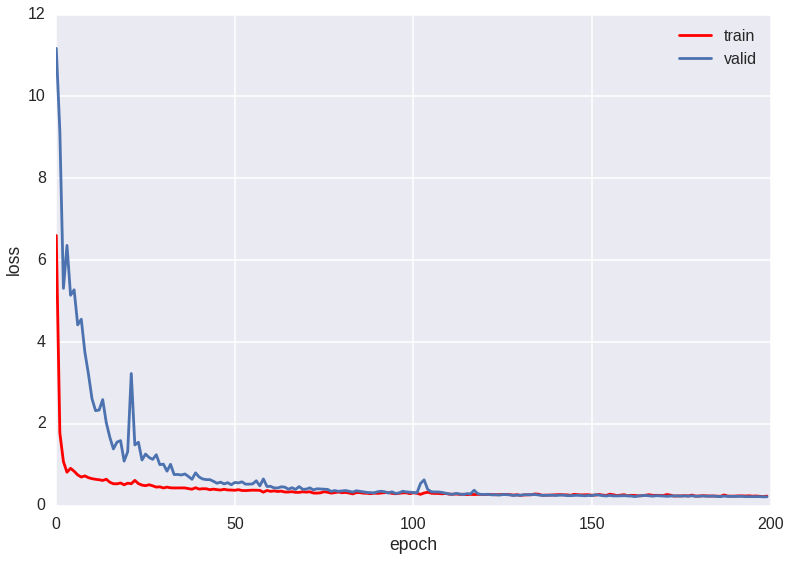

{'epoch': 200,
 'train_loss': 0.23218217754361972,
 'valid_accuracy': 0.97297297297297303,
 'valid_loss': 0.21560633518619121}

In [191]:
layers0 = [('input', layers.InputLayer),
           
            ('dropoutf', layers.DropoutLayer),
            ('dense0', layers.DenseLayer),
            ('dropout', layers.DropoutLayer),
#             ('dense1', layers.DenseLayer),
#             ('dropout2', layers.DropoutLayer), 
#             ('dense2', layers.DenseLayer),
#             ('dropout3', layers.DropoutLayer), 

            ('output', layers.DenseLayer)]

net0 = NeuralNet(layers=layers0, 
                 
        input_shape=(None, num_features),

        dropoutf_p=0.15,
        dense0_num_units=1000,
        dropout_p=0.25,
#         dense1_num_units=500,
#         dropout2_p=0.25,
#         dense2_num_units=250,
#         dropout3_p=0.25,

        output_num_units=num_classes,
        output_nonlinearity=softmax,

#         update=nesterov_momentum,
#         update=adadelta,
        update=adagrad,
        update_learning_rate=0.01,
#         update_momentum=0.9, # only used with nesterov_
        eval_size=0.01,
        verbose=0,
        max_epochs=200)

np.random.seed(1800)
net0.fit(train, y)
plot_training_history(net0)

net0.train_history_[-1]

In [193]:
predicted_ANN_df = pd.DataFrame(net0.predict_proba(X_unclass), columns=labels_dict.keys())
predicted_ANN_df

,phlebovirus,ortobunyavirus,nairovirus,negevirus,hantavirus
0,0.260677,0.142784,0.103284,0.300221,0.193035
1,0.038522,0.281227,0.135844,0.447627,0.096780
2,0.038522,0.281227,0.135844,0.447627,0.096780
3,0.038522,0.281227,0.135844,0.447627,0.096780
4,0.081110,0.102110,0.028918,0.013010,0.774852
5,0.087077,0.163070,0.031189,0.108152,0.610511
6,0.377986,0.114738,0.230176,0.182008,0.095092
7,0.181184,0.102880,0.047278,0.144366,0.524292
8,0.018663,0.224376,0.111972,0.607167,0.037823
9,0.018056,0.199480,0.102074,0.644725,0.035665


In [197]:
np.sum(predicted_ANN_df.iloc[10].values)

# just making sure they sum to 1 :)

1.0

### So, using a simple deep learning net achieves better separation, but I would also suggest experimenting with SVMs. Look them up on scikit-learn and use similar API to GBC (different params obviously).